**Data analysis**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

**(Pre)process data**

In [2]:
def load_and_combine_data(data_directory):
    '''Takes a folder with many csv files, combines it and returns a combined data frame'''
    csv_files = [file for file in os.listdir(data_directory) if file.endswith('.csv')]

    combined_data = pd.DataFrame()

    for run_number, file in enumerate(csv_files, start=1):
        file_path = os.path.join(data_directory, file)
        df = pd.read_csv(file_path)
        df.columns = [f"{col}, run {run_number}" for col in df.columns]
        combined_data = pd.concat([combined_data, df], axis=1) # Horizontal concatenation
        
    return combined_data


#Create dataframes for every experiment
islanding_1235_data = load_and_combine_data('results_islanding_1235')
islanding_678_data = load_and_combine_data('results_islanding_678')
no_islanding_1235_data = load_and_combine_data('results_no_islanding_1235')
no_islanding_678_data = load_and_combine_data('results_no_islanding_678')

In [3]:
def calculate_aggregates_avg_std(df):
    '''Takes dataframe with mean fitness, best fitness over multiple runs
    and inserts columns with aggregate values into said dataframe (averages and std)'''
    
    #Filter
    mean_fitness_cols = [col for col in df.columns if col.startswith('Mean fitness')]
    
    #Create avg and std aggregate columns
    df['Avg of mean fitness (all runs)'] = df[mean_fitness_cols].mean(axis=1)
    df['Std of mean fitness (all runs)'] = df[mean_fitness_cols].std(axis=1)
    
    
    #Filter
    best_fitness_cols = [col for col in df.columns if col.startswith('Best fitness')]
    #Create avg and std aggregate run columns
    df['Avg of best fitness (all runs)'] = df[best_fitness_cols].mean(axis=1)
    df['Std of best fitness (all runs)'] = df[best_fitness_cols].std(axis=1)
    
    return df


#Aggregate runs for every experiment
islanding_1235_data = calculate_aggregates_avg_std(islanding_1235_data)
islanding_678_data = calculate_aggregates_avg_std(islanding_678_data)
no_islanding_1235_data = calculate_aggregates_avg_std(no_islanding_1235_data)
no_islanding_678_data = calculate_aggregates_avg_std(no_islanding_678_data)

**Generate fitness plots**

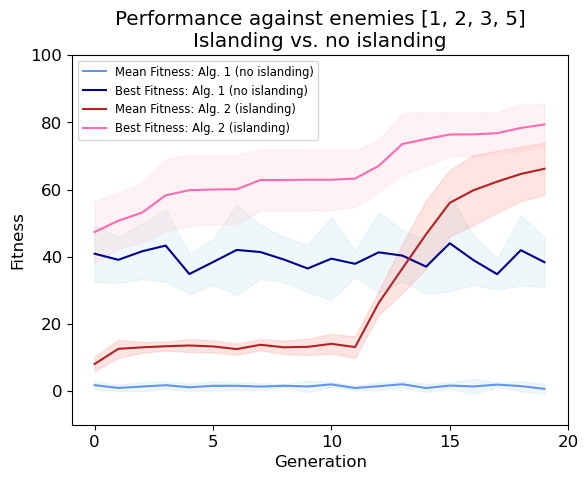

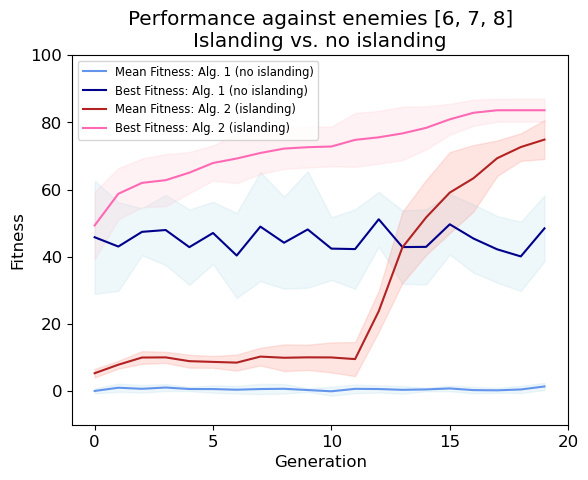

In [4]:
def plot_fitness(df_no_islanding, df_islanding, enemy_set):
    '''Takes two dataframes (islanding and no islanding) together with an enemy set (string!)
    that the algorithms were trained against.
    Plots mean fitness for both (with standard deviation intervals).'''
    
    plt.rc('font', size=12)
    fig, ax = plt.subplots()
    ax.set_xlabel('Generation')
    ax.set_ylabel('Fitness')
    ax.set_title(f'Performance against enemies {enemy_set}\nIslanding vs. no islanding')


    #Mean fitness: no islanding
    x1 = df_no_islanding.index
    y1 = df_no_islanding['Avg of mean fitness (all runs)']
    std1 = df_no_islanding['Std of mean fitness (all runs)'] 

    ax.plot(x1, y1, color = 'cornflowerblue', label='Mean Fitness: Alg. 1 (no islanding)')
    ax.fill_between(x1, 
                     y1 - std1,
                     y1 + std1,
                    color = 'lightblue',
                     alpha=0.2)


    #Best fitness: no islanding
    x2 = df_no_islanding.index
    y2 = df_no_islanding['Avg of best fitness (all runs)']
    std2 = df_no_islanding['Std of best fitness (all runs)']
    ax.plot(x2, y2, color = 'darkblue', label='Best Fitness: Alg. 1 (no islanding)')
    ax.fill_between(x2, 
                     y2 - std2,
                     y2 + std2,
                    color = 'lightblue',
                    alpha=0.2)

    #Mean fitness: islanding
    x3 = df_islanding.index
    y3 = df_islanding['Avg of mean fitness (all runs)']
    std3 = df_islanding['Std of mean fitness (all runs)'] 

    ax.plot(x3, y3, color = 'firebrick', label='Mean Fitness: Alg. 2 (islanding)')
    ax.fill_between(x3, 
                     y3 - std3,
                     y3 + std3,
                    color = 'salmon',
                     alpha=0.2)


    #Best fitness: islanding
    x4 = df_islanding.index
    y4 = df_islanding['Avg of best fitness (all runs)']
    std4 = df_islanding['Std of best fitness (all runs)']
    ax.plot(x4, y4, color = 'hotpink', label='Best Fitness: Alg. 2 (islanding)')
    ax.fill_between(x4, 
                     y4 - std4,
                     y4 + std4,
                    color = 'pink',
                    alpha=0.2)


    ax.set_xticks(range(0, 21, 5))
    ax.set_ylim(-10, 100)
    ax.legend(fontsize = 'x-small')
    
    #save
    plot_name = f'fitness_{enemy_set}'
    plt.savefig(plot_name, dpi = 300)
    
    
    
#Generate plots for both enemy sets
plot_fitness(no_islanding_1235_data, islanding_1235_data, '[1, 2, 3, 5]')
plot_fitness(no_islanding_678_data, islanding_678_data, '[6, 7, 8]')

**Extract average individual gain datasets**

In [5]:
#Function extracts individual of every run
def get_best_individual_gain(data_frame):
    '''Takes the dataframe that stores (average) individual gain for best individual of every run.
    Extracts (average) individual gain values of every run and returns them as a list.'''
    
    best_individual_gain_cols = [col for col in data_frame.columns if col.startswith('Individual Gain')]
    
    best_individual_gain_values = []
    
    for col_label in best_individual_gain_cols:
        best_individual_gain_values.append(data_frame[col_label].iloc[0])
    
    return best_individual_gain_values

**Create a boxplot**

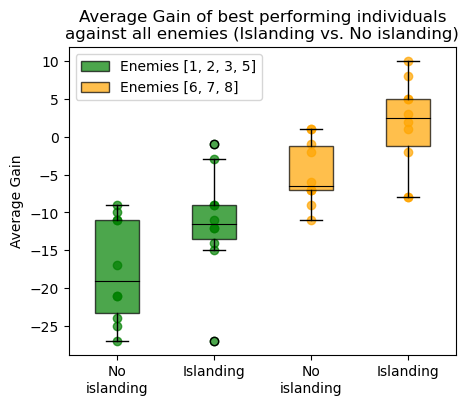

In [20]:
#Create box plot

fig, ax = plt.subplots(figsize=(5, 4))
plt.rc('font', size=10)

datasets = [get_best_individual_gain(no_islanding_1235_data), get_best_individual_gain(islanding_1235_data), get_best_individual_gain(no_islanding_678_data), get_best_individual_gain(islanding_678_data)]

boxplot_colors = ['green', 'green', 'orange', 'orange']

bp = ax.boxplot(datasets, patch_artist=True, medianprops={'color': 'black', 'linewidth': 0.8})

for box, color in zip(bp['boxes'], boxplot_colors):
    box.set(facecolor=color, alpha=0.7)

# Add the actual data points using scatter plots
for i, data in enumerate(datasets):
    x = [i + 1] * len(data)
    ax.scatter(x, data, color=boxplot_colors[i], alpha=0.7)

ax.set_xticklabels(['No\nislanding', 'Islanding', 'No\nislanding', 'Islanding'])
ax.set_ylabel('Average Gain')
ax.set_title('Average Gain of best performing individuals\nagainst all enemies (Islanding vs. No islanding)')
ax.legend([bp["boxes"][0], bp["boxes"][2]], ['Enemies [1, 2, 3, 5]', 'Enemies [6, 7, 8]'])
plt.savefig('boxplot')